# Packages

In [1]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import mitosheet
from stargazer.stargazer import Stargazer

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None) # show full width of showing cols

# Master frame

In [2]:
dfMaster = pd.read_csv("/Volumes/Extreme SSD/97_FinalSet/MEV_finalDataSet_v2.csv")

In [3]:
dfMaster.head(2)



,Unnamed: 0,block_number,tot_gas,avg_gas,median_gas,tx,ts,threshold_gas,GasFee_Gwei,gasUsed,AttackCount,gasPrice_min,gasPrice_max,gasPrice_avg,difficulty,transaction_count,price_USD,ts_EthPrice,price_USD_delta,time_delta,price_USD_MA5,price_USD_MA30min,price_USD_MA24h,AttackCount_10k
0,0,10093070,22817345,34.401466,20.0,92,2020-05-19 00:00:32,16.5,0.0,0,0.0,0.0,0.0,0.0,2286461242157597,92,214.91,2020-05-19 00:01:02,0.0,0.0,0.0,0.0,0.0,0.0
1,1,10093071,37810488,38.025468,20.0,59,2020-05-19 00:00:59,16.5,0.0,0,0.0,0.0,0.0,0.0,2284228369851059,59,214.91,2020-05-19 00:01:02,0.0,27.0,0.0,0.0,0.0,0.0


# Gas price data

In [2]:
dfGasPriceAll = pd.read_parquet(f"/Volumes/Extreme SSD/01_GasData/GasPriceAll.par")


In [3]:
dfGasPriceAll = dfGasPriceAll.sort_values(by = "block_number", ascending = True)
# Rename threshold column
dfGasPriceAll = dfGasPriceAll.rename(columns = {"trans_gasPrice_Gwei":"threshold_gas"})

In [6]:
dfGasPriceAll["avg_gas_log"] = np.log(dfGasPriceAll["avg_gas"])

In [4]:
dfBarbon = pd.read_parquet(f"/Volumes/Extreme SSD/01_GasData/gas_ts_block.par")


In [13]:
dfBarbonScope = dfBarbon.loc[10093070:12500188]


In [14]:
dfBarbonScope

,tot_gas,avg_gas,median_gas,tx,ts
10093070,22817345,34.401466,20.000000,92,2020-05-19 00:00:32
10093071,37810488,38.025468,20.000000,59,2020-05-19 00:00:59
10093072,19912767,66.245960,31.900000,56,2020-05-19 00:01:04
10093073,43009981,23.723614,18.000001,93,2020-05-19 00:01:29
10093074,26796744,41.613122,20.000000,77,2020-05-19 00:01:37
...,...,...,...,...,...
12500184,42583689,53.583429,46.200000,266,2021-05-24 23:58:42
12500185,24883565,41.715752,40.000000,213,2021-05-24 23:59:12
12500186,43760172,50.266184,46.805000,326,2021-05-24 23:59:14
12500187,54665462,46.356423,44.000000,163,2021-05-24 23:59:41


In [ ]:
dfGasPriceAll

In [8]:
import mitosheet
mitosheet.sheet(dfGasPriceAll, analysis_to_replay="id-ociefsekff")

MitoWidget(analysis_data_json='{"analysisName": "id-ociefsekff", "analysisToReplay": null, "code": [], "stepSu…

In [21]:
dfGasPriceAll.describe()

,tot_gas,avg_gas,median_gas,tx,block_number_bar,block_number,threshold_gas
count,2.345143e+06,2.345143e+06,2.345143e+06,2.345143e+06,2.345143e+06,2.345143e+06,2.345143e+06
mean,3.222173e+07,1.074692e+02,9.590141e+01,1.859253e+02,1.130276e+07,1.130276e+07,8.620463e+01
std,1.489559e+07,2.481893e+03,8.633097e+01,6.470465e+01,6.937131e+05,6.937131e+05,7.825787e+01
min,6.000000e+04,3.646296e-01,0.000000e+00,1.000000e+00,1.009307e+07,1.009307e+07,1.004233e+00
25%,2.467491e+07,4.556249e+01,4.000000e+01,1.460000e+02,1.070415e+07,1.070415e+07,3.500000e+01
50%,2.930626e+07,8.022090e+01,7.300000e+01,1.820000e+02,1.130473e+07,1.130473e+07,6.583500e+01
75%,3.552057e+07,1.333039e+02,1.230000e+02,2.210000e+02,1.190390e+07,1.190390e+07,1.110000e+02
max,8.677214e+08,3.006170e+06,8.800000e+03,7.140000e+02,1.250019e+07,1.250019e+07,1.225840e+04


In [ ]:
dfGasPriceAll

In [9]:
import mitosheet
mitosheet.sheet(dfGasPriceAll)

MitoWidget(analysis_data_json='{"analysisName": "id-npspcuhhua", "analysisToReplay": null, "code": [], "stepSu…

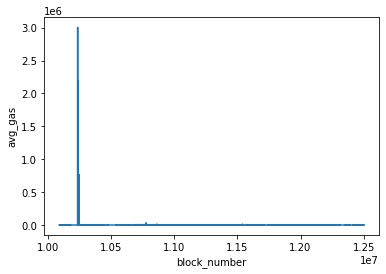

In [25]:
np.log(dfGasPriceAll[avg_gas])

NameError: name 'avg_gas' is not defined

In [33]:
avg_gas_log = np.log(dfGasPriceAll["avg_gas"])


# Plot: gas price

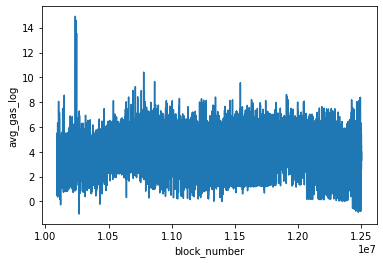

In [7]:
line_avg_gas = sns.lineplot(x="block_number", y="avg_gas_log", data=dfGasPriceAll)

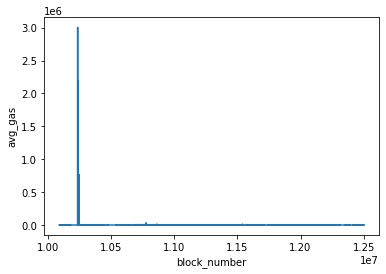

In [10]:
line_avg_gas = sns.lineplot(x="block_number", y="avg_gas", data=dfGasPriceAll)
#line_avg_gas.set(ylim=(0, 1000))

[(0.0, 200.0)]

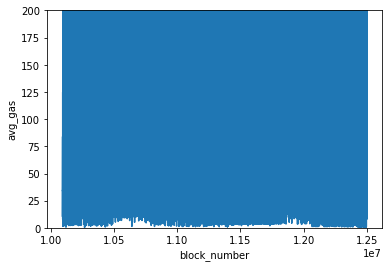

In [11]:
line_avg_gas = sns.lineplot(x="block_number", y="avg_gas", data=dfGasPriceAll)
line_avg_gas.set(ylim=(0, 200))

In [8]:
import mitosheet
mitosheet.sheet(dfGasPriceAll, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "id-yknlubjckh", "analysisToReplay": null, "code": [], "stepSu…

In [9]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.line(dfGasPriceAll, x='block_number', y='avg_gas')
fig.update_layout(
    title='block_number, avg_gas line', 
    xaxis = dict(
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(

    ), 
    paper_bgcolor='#FFFFFF', 
    showlegend=True
)
fig.show(renderer="iframe")

# GLS regression

In [25]:
# Load packages
import statsmodels.api as sm
import numpy as np
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)
import statsmodels.formula.api as smf

## Load regression data set prepared in R

In [77]:
dfRegression = pd.read_csv("/Volumes/Extreme SSD/97_FinalSet/MEV_Regression_v1.csv")

In [68]:
dfRegressionSmall = pd.read_csv("/Volumes/Extreme SSD/97_FinalSet/MEV_RegressionSmall_v1.csv")


In [58]:
# create X and Y dataframes
X = dfRegressionSmall[['median_gas', 'difficulty']]
X = sm.add_constant(X)
Y = dfRegressionSmall[['avg_gas']]

In [75]:
dfRegression.head()
dfRegression["difficulty"].mean()

0.018376633402057446

In [15]:
dfRegression.dtypes

IDSeq                          int64
block_number                   int64
avg_gas                      float64
median_gas                   float64
threshold_gas                float64
attacks_GasFee_Gwei          float64
attacks_GasFee_ETH           float64
attacks_GasUsed                int64
AttackCount                    int64
attacks_gasPrice_max         float64
attacks_gasPrice_avg         float64
attacks_AttackGasFeeShare    float64
difficulty                   float64
price_USD_delta              float64
transaction_count_block        int64
AttackCount_10k                int64
flashbots_Flag                 int64
Month                          int64
WeekNumber                     int64
Weekyday                       int64
Hour                           int64
dtype: object

## Write model 
* https://www.statsmodels.org/dev/examples/notebooks/generated/gls.html
* https://www.youtube.com/watch?v=yeD5ypVdB1s
* https://www.statsmodels.org/0.6.1/examples/notebooks/generated/gls.html
* Adding interaction terms: https://stackoverflow.com/questions/45828964/how-to-add-interaction-term-in-python-sklearn
* https://github.com/markumreed/data_science_for_everyone/blob/main/statsmodels_examples/02_fitting_models_using_r_style_formulas.ipynb
* GLSAR with formula like R: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.GLSAR.from_formula.html
* Stargazer in pythoin https://stackoverflow.com/questions/67030470/python-stargazer-latex-output-unusable


### GLSAR model

#### Complex

In [67]:
# Model with interaction term and without (for testing)

glsar_model_AR1 = sm.GLSAR.from_formula(formula= "avg_gas ~ attacks_GasFee_Gwei + AttackCount + C(flashbots_Flag) + C(flashbots_Flag):attacks_GasFee_Gwei + difficulty + price_USD_delta + transaction_count_block + C(Weekyday) + C(Hour)", data=dfRegression, rho = 1)
glsarAR1_results = glsar_model_AR1.iterative_fit(100)
print(glsarAR1_results.summary())
# print(glsarAR1_results.summary().as_latex()) # Latex output

#glsar_model = formula="avg_gas ~ median_gas", data=dfRegression

                           GLSAR Regression Results                           
Dep. Variable:                avg_gas   R-squared:                       0.105
Model:                          GLSAR   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     7674.
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:01:13   Log-Likelihood:            -1.2446e+07
No. Observations:             2346701   AIC:                         2.489e+07
Df Residuals:                 2346664   BIC:                         2.489e+07
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [69]:
dfRegressionSmall

,IDSeq,block_number,avg_gas,median_gas,threshold_gas,attacks_GasFee_Gwei,attacks_GasFee_ETH,attacks_GasUsed,AttackCount,attacks_gasPrice_max,attacks_gasPrice_avg,attacks_AttackGasFeeShare,difficulty,price_USD_delta,transaction_count_block,AttackCount_10k,flashbots_Flag,Month,WeekNumber,Weekyday,Hour,avg_gas_lag1
0,2,10093071,38.025468,20.000000,16.500000,0.0,0.0,0,0,0.0,0.0,0.0,0.021013,0.00,59,0,0,5,21,2,0,34.401466
1,3,10093072,66.245960,31.900000,6.000000,0.0,0.0,0,0,0.0,0.0,0.0,0.021189,-0.33,56,0,0,5,21,2,0,38.025468
2,4,10093073,23.723614,18.000001,16.000000,0.0,0.0,0,0,0.0,0.0,0.0,0.021013,0.00,93,0,0,5,21,2,0,66.245960
3,5,10093074,41.613122,20.000000,16.000000,0.0,0.0,0,0,0.0,0.0,0.0,0.021189,-0.14,77,0,0,5,21,2,0,23.723614
4,6,10093075,37.484420,19.025810,16.000000,0.0,0.0,0,0,0.0,0.0,0.0,0.021189,0.00,137,0,0,5,21,2,0,41.613122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9997,10103559,58.173645,48.000002,43.000000,0.0,0.0,0,0,0.0,0.0,0.0,0.020770,0.00,119,2,0,5,21,3,15,40.650019
9996,9998,10103560,44.273797,42.000000,37.418746,0.0,0.0,0,0,0.0,0.0,0.0,0.020594,-1.35,128,2,0,5,21,3,15,58.173645
9997,9999,10103561,67.410133,43.004300,36.000000,0.0,0.0,0,0,0.0,0.0,0.0,0.020770,0.04,140,2,0,5,21,3,15,44.273797
9998,10000,10103562,39.700204,36.000000,35.200000,0.0,0.0,0,0,0.0,0.0,0.0,0.020946,0.56,55,2,0,5,21,3,15,67.410133


#### Simple

In [87]:
# Simply GLSAR to compare with results from R => same resuklts for simple model, small dataset and high numbe rof iterations for fit
#avg_gas ~ difficulty + avg_gas_lag1
glsar_model_AR1 = sm.GLSAR.from_formula(formula= "avg_gas ~ difficulty", data=dfRegression, rho = 1)
glsarAR1_results = glsar_model_AR1.iterative_fit(100)
print(glsarAR1_results.summary())
# print(glsarAR1_results.summary().as_latex()) # Latex output

#glsar_model = formula="avg_gas ~ median_gas", data=dfRegression

                           GLSAR Regression Results                           
Dep. Variable:                avg_gas   R-squared:                       0.007
Model:                          GLSAR   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                 1.638e+04
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:38:23   Log-Likelihood:            -1.2568e+07
No. Observations:             2346700   AIC:                         2.514e+07
Df Residuals:                 2346698   BIC:                         2.514e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     76.0989      0.297    256.416      0.0

In [59]:
# Alternative formulation using vectors
glsar_model = sm.GLSAR(Y, X, 1)
glsar_results = glsar_model.iterative_fit(1)
#glsar_results = glsar_model.fit()
print(glsar_results.summary())

                           GLSAR Regression Results                           
Dep. Variable:                avg_gas   R-squared:                       0.683
Model:                          GLSAR   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                 1.077e+04
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:29:10   Log-Likelihood:                -34418.
No. Observations:                9999   AIC:                         6.884e+04
Df Residuals:                    9996   BIC:                         6.886e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2061      0.322      6.862      0.0

In [10]:
glsar_model.endog_names

'avg_gas'

In [12]:
glsar_results.params

const         6.442569
median_gas    1.026575
dtype: float64

### OLS model

#### Simple

In [84]:

# OLS model_ full formula => produces same estimate as lm in R
# https://stackoverflow.com/questions/41765767/different-results-from-lm-in-r-vs-statsmodel-ols-in-python
#X = sm.add_constant(X)
#model = sm.OLS(Y, X)
#results = model.fit()
#avg_gas ~ difficulty + avg_gas_lag1
resultsFormula = smf.ols(formula= "avg_gas ~ difficulty + avg_gas_lag1", data=dfRegression).fit()
print(resultsFormula.summary())


                            OLS Regression Results                            
Dep. Variable:                avg_gas   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                 2.809e+06
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:21:35   Log-Likelihood:            -1.2568e+07
No. Observations:             2346701   AIC:                         2.514e+07
Df Residuals:                 2346698   BIC:                         2.514e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.2272      0.058    226.325   

In [88]:

# OLS model_ full formula => produces same estimate as lm in R
# https://stackoverflow.com/questions/41765767/different-results-from-lm-in-r-vs-statsmodel-ols-in-python
#X = sm.add_constant(X)
#model = sm.OLS(Y, X)
#results = model.fit()
#avg_gas ~ difficulty + avg_gas_lag1
resultsFormula = smf.ols(formula= "avg_gas ~ difficulty ", data=dfRegression).fit()
print(resultsFormula.summary())


                            OLS Regression Results                            
Dep. Variable:                avg_gas   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                 1.659e+05
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:53:33   Log-Likelihood:            -1.3922e+07
No. Observations:             2346701   AIC:                         2.784e+07
Df Residuals:                 2346699   BIC:                         2.784e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     76.7280      0.091    841.305      0.0

In [66]:

# OLS model_ full formula => produces same estimate as lm in R
# https://stackoverflow.com/questions/41765767/different-results-from-lm-in-r-vs-statsmodel-ols-in-python
#X = sm.add_constant(X)
#model = sm.OLS(Y, X)
#results = model.fit()

resultsFormula = smf.ols(formula= "avg_gas ~ attacks_GasFee_Gwei + AttackCount + C(flashbots_Flag) + C(flashbots_Flag):attacks_GasFee_Gwei + difficulty + price_USD_delta + transaction_count_block + C(Weekyday) + C(Hour)", data=dfRegression).fit()
print(resultsFormula.summary())


                            OLS Regression Results                            
Dep. Variable:                avg_gas   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                 1.437e+04
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:57:37   Log-Likelihood:            -1.3769e+07
No. Observations:             2346702   AIC:                         2.754e+07
Df Residuals:                 2346665   BIC:                         2.754e+07
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [41]:
dfRegression["difficulty"].mean()

0.3005386550209898